In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=300

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix


import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

# Bank data 

- Read the data

In [2]:
df = pd.read_csv('D:\\Data Science Assignments\\Assignment 6 Logistic regression\\bank-full.csv',sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# EDA

In [3]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
df.loc[:,['job','education','contact','poutcome']]

,job,education,contact,poutcome
0,management,tertiary,unknown,unknown
1,technician,secondary,unknown,unknown
2,entrepreneur,secondary,unknown,unknown
3,blue-collar,unknown,unknown,unknown
4,unknown,unknown,unknown,unknown
...,...,...,...,...
45206,technician,tertiary,cellular,unknown
45207,retired,primary,cellular,unknown
45208,retired,secondary,cellular,success
45209,blue-collar,secondary,telephone,unknown


In [10]:
df.replace('unknown',np.nan,inplace=True)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no


In [11]:
si = SimpleImputer(strategy='most_frequent')
df.loc[:,['job','education','contact','poutcome']] = si.fit_transform(df.loc[:,['job','education','contact','poutcome']])

In [12]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,failure,no
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,failure,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,failure,no
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,failure,no
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,failure,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,failure,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,failure,no


<Axes: >

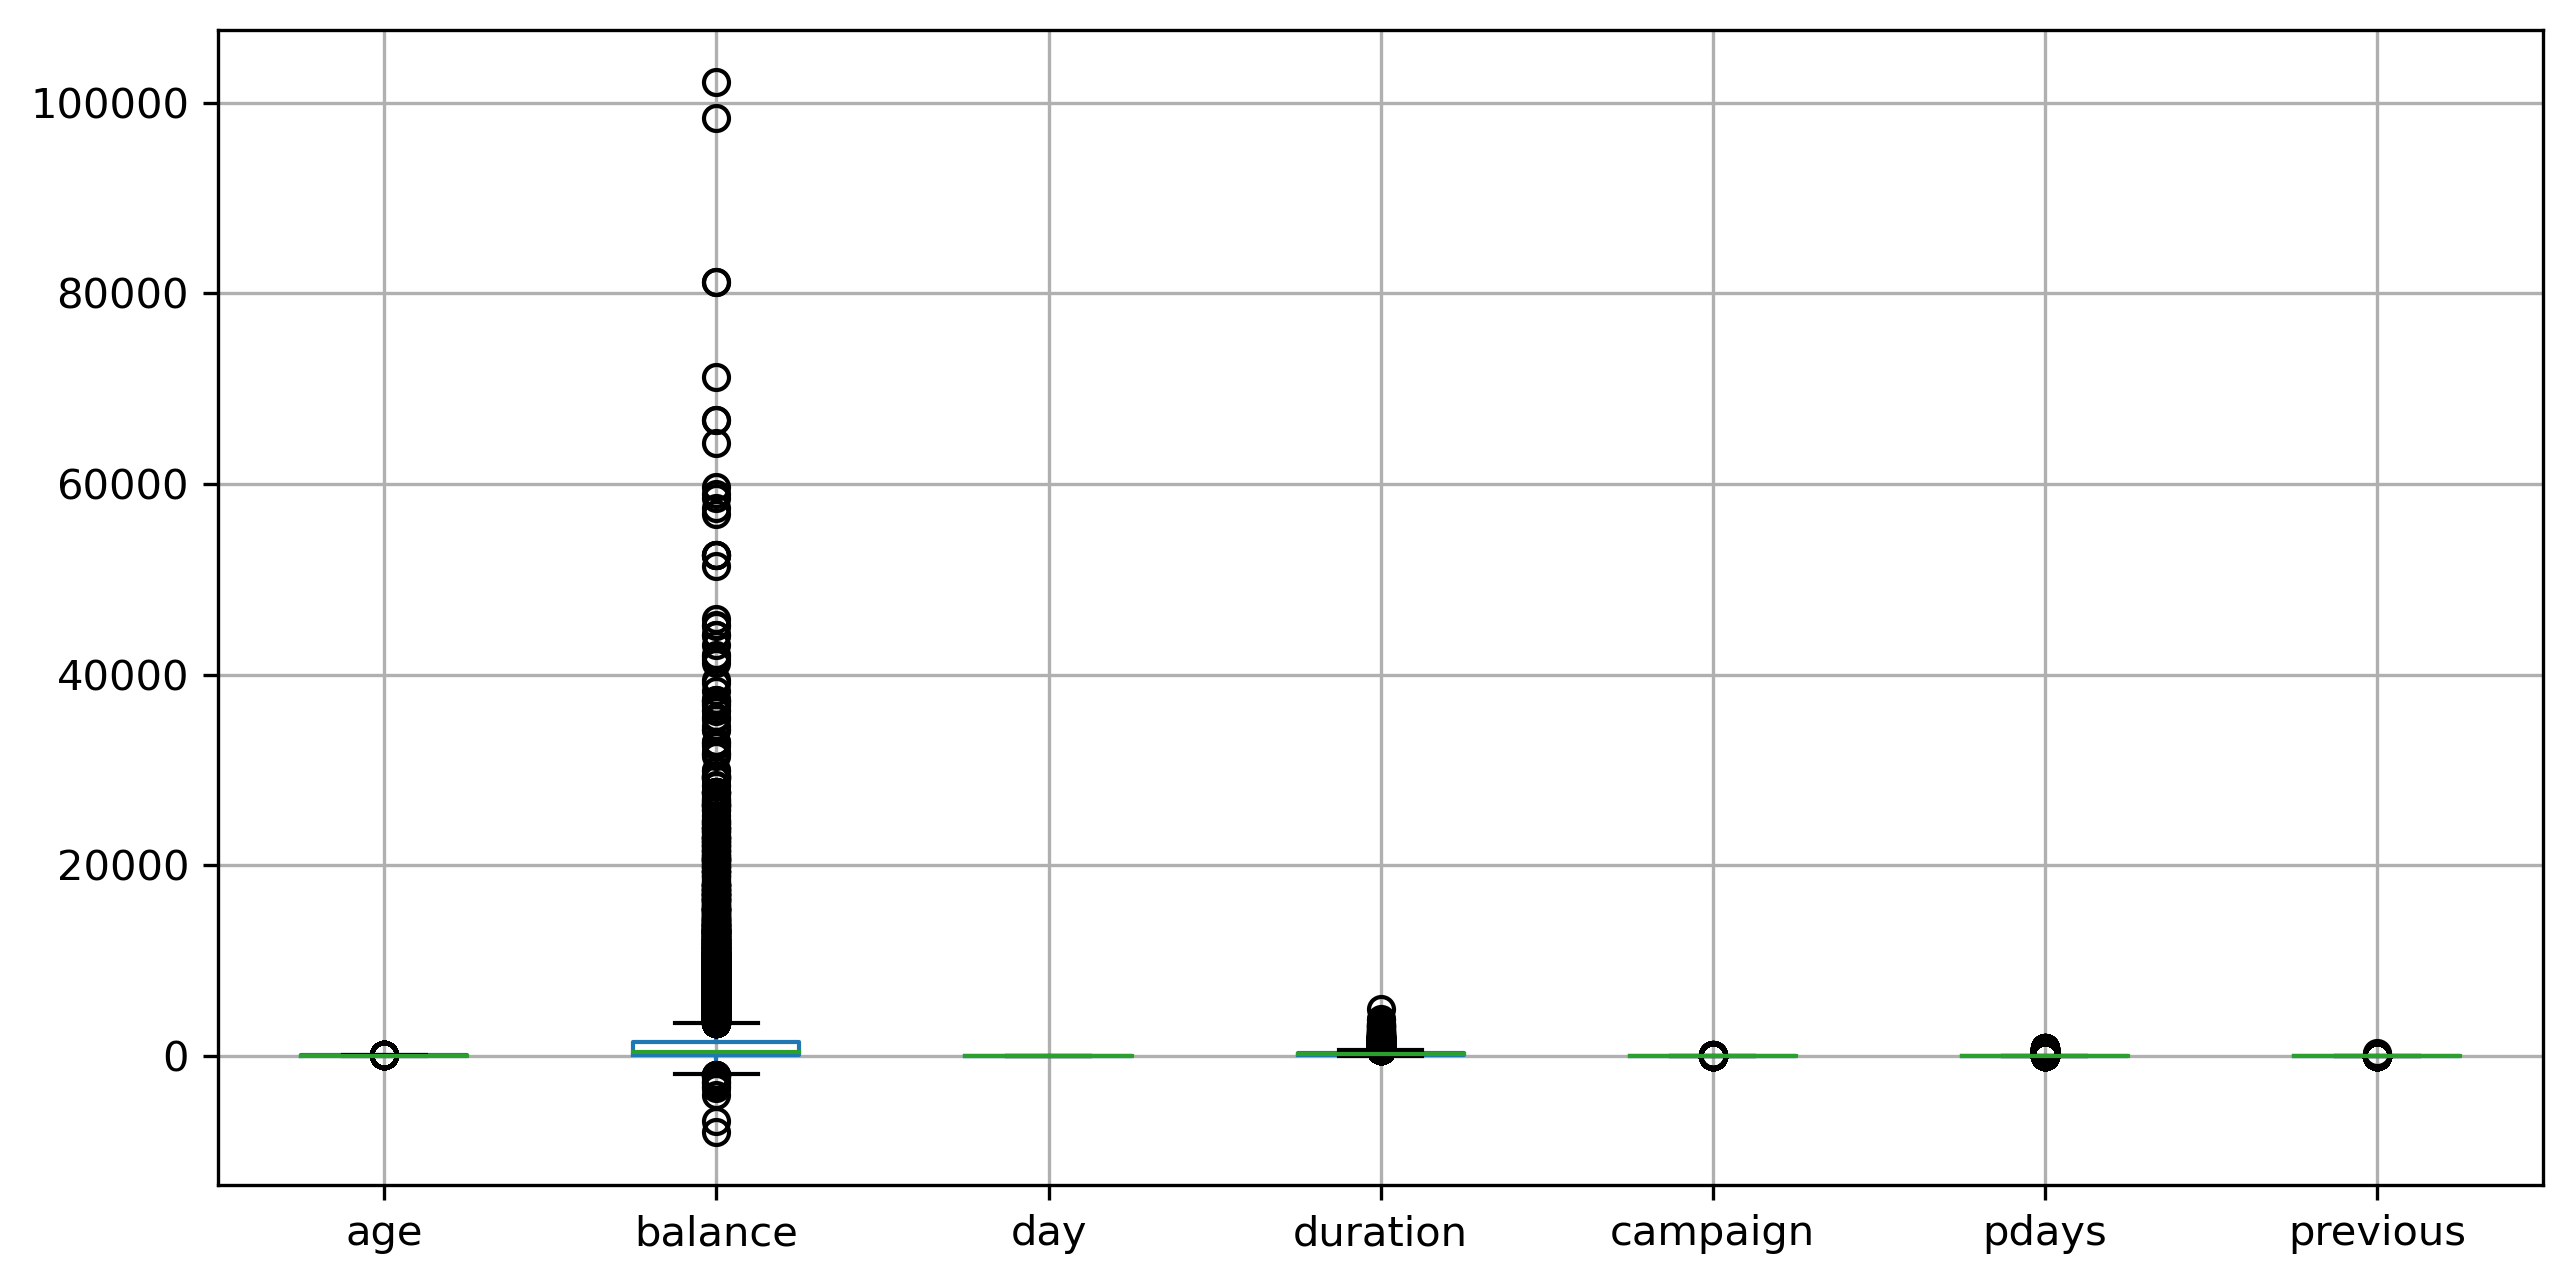

In [13]:
df.boxplot()

In [14]:
num_cols = df.select_dtypes(include='number')
num_cols

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [15]:
num_cols.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [16]:
def outlier_detection(data, cols):
    
    for col in cols:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3-q1
    
        lower = q1-(1.5*iqr)
        upper = q3+(1.5*iqr)
        
        num_cols[col] = np.where(num_cols[col] > upper, upper, np.where(num_cols[col] < lower, lower,num_cols[col]))

In [17]:
outlier_detection(num_cols,num_cols.columns)

<Axes: >

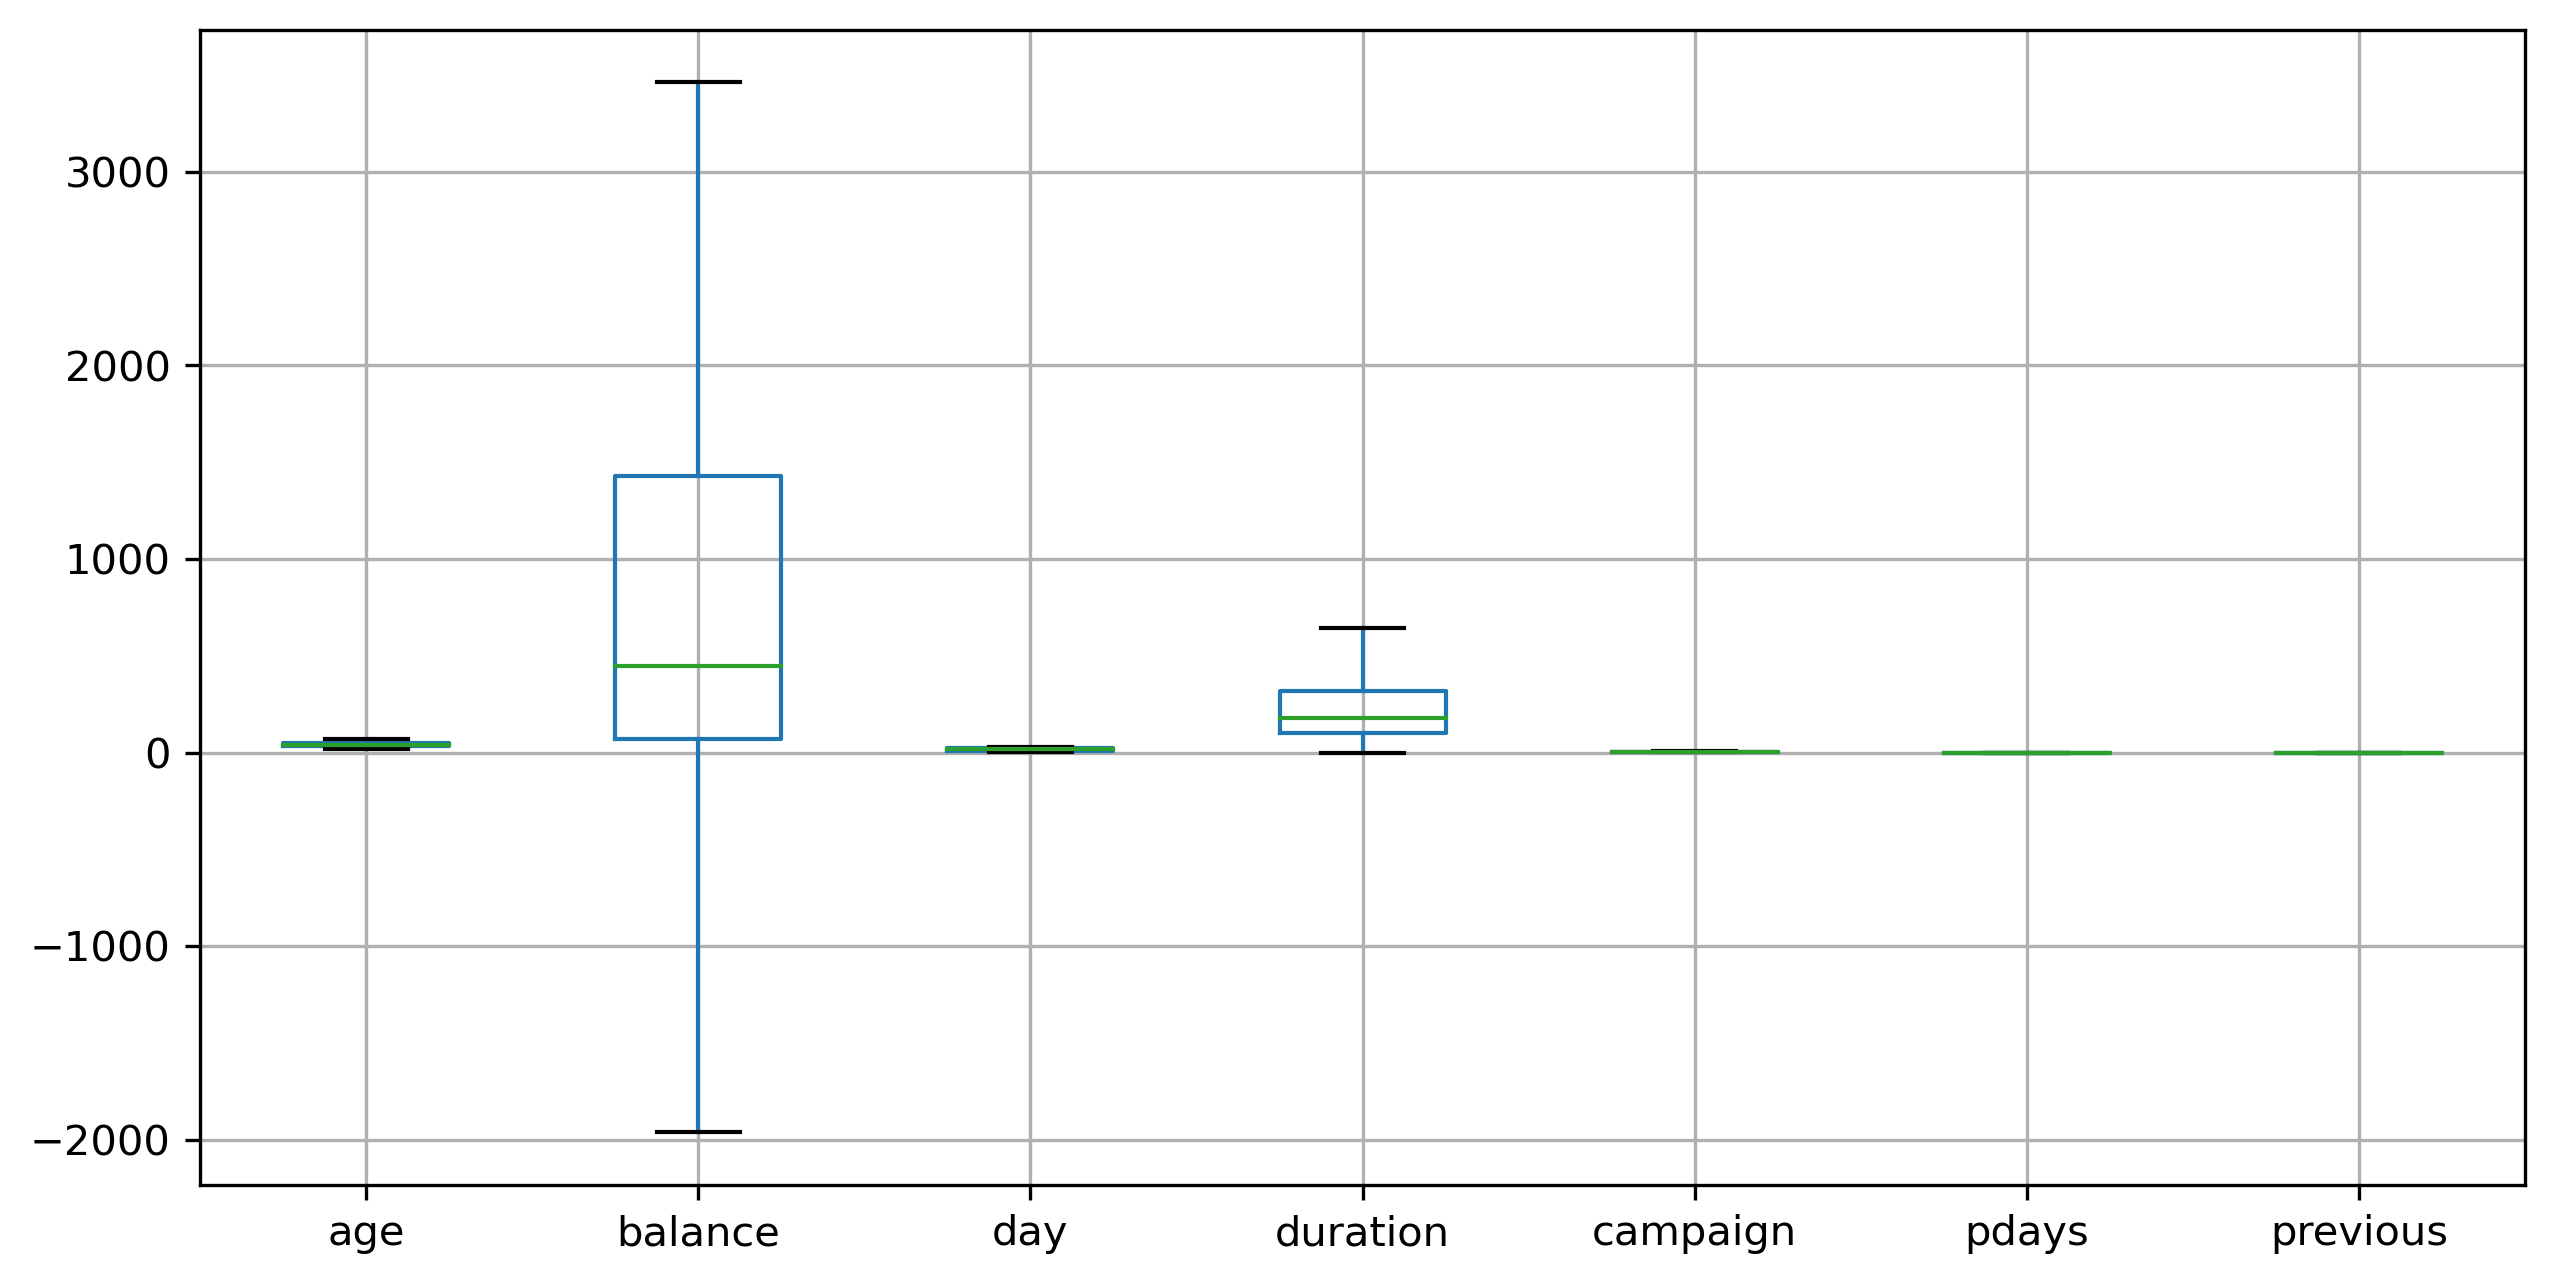

In [18]:
num_cols.boxplot()

In [19]:
df.loc[:,['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [20]:
df.loc[:,['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']] = num_cols

<Axes: >

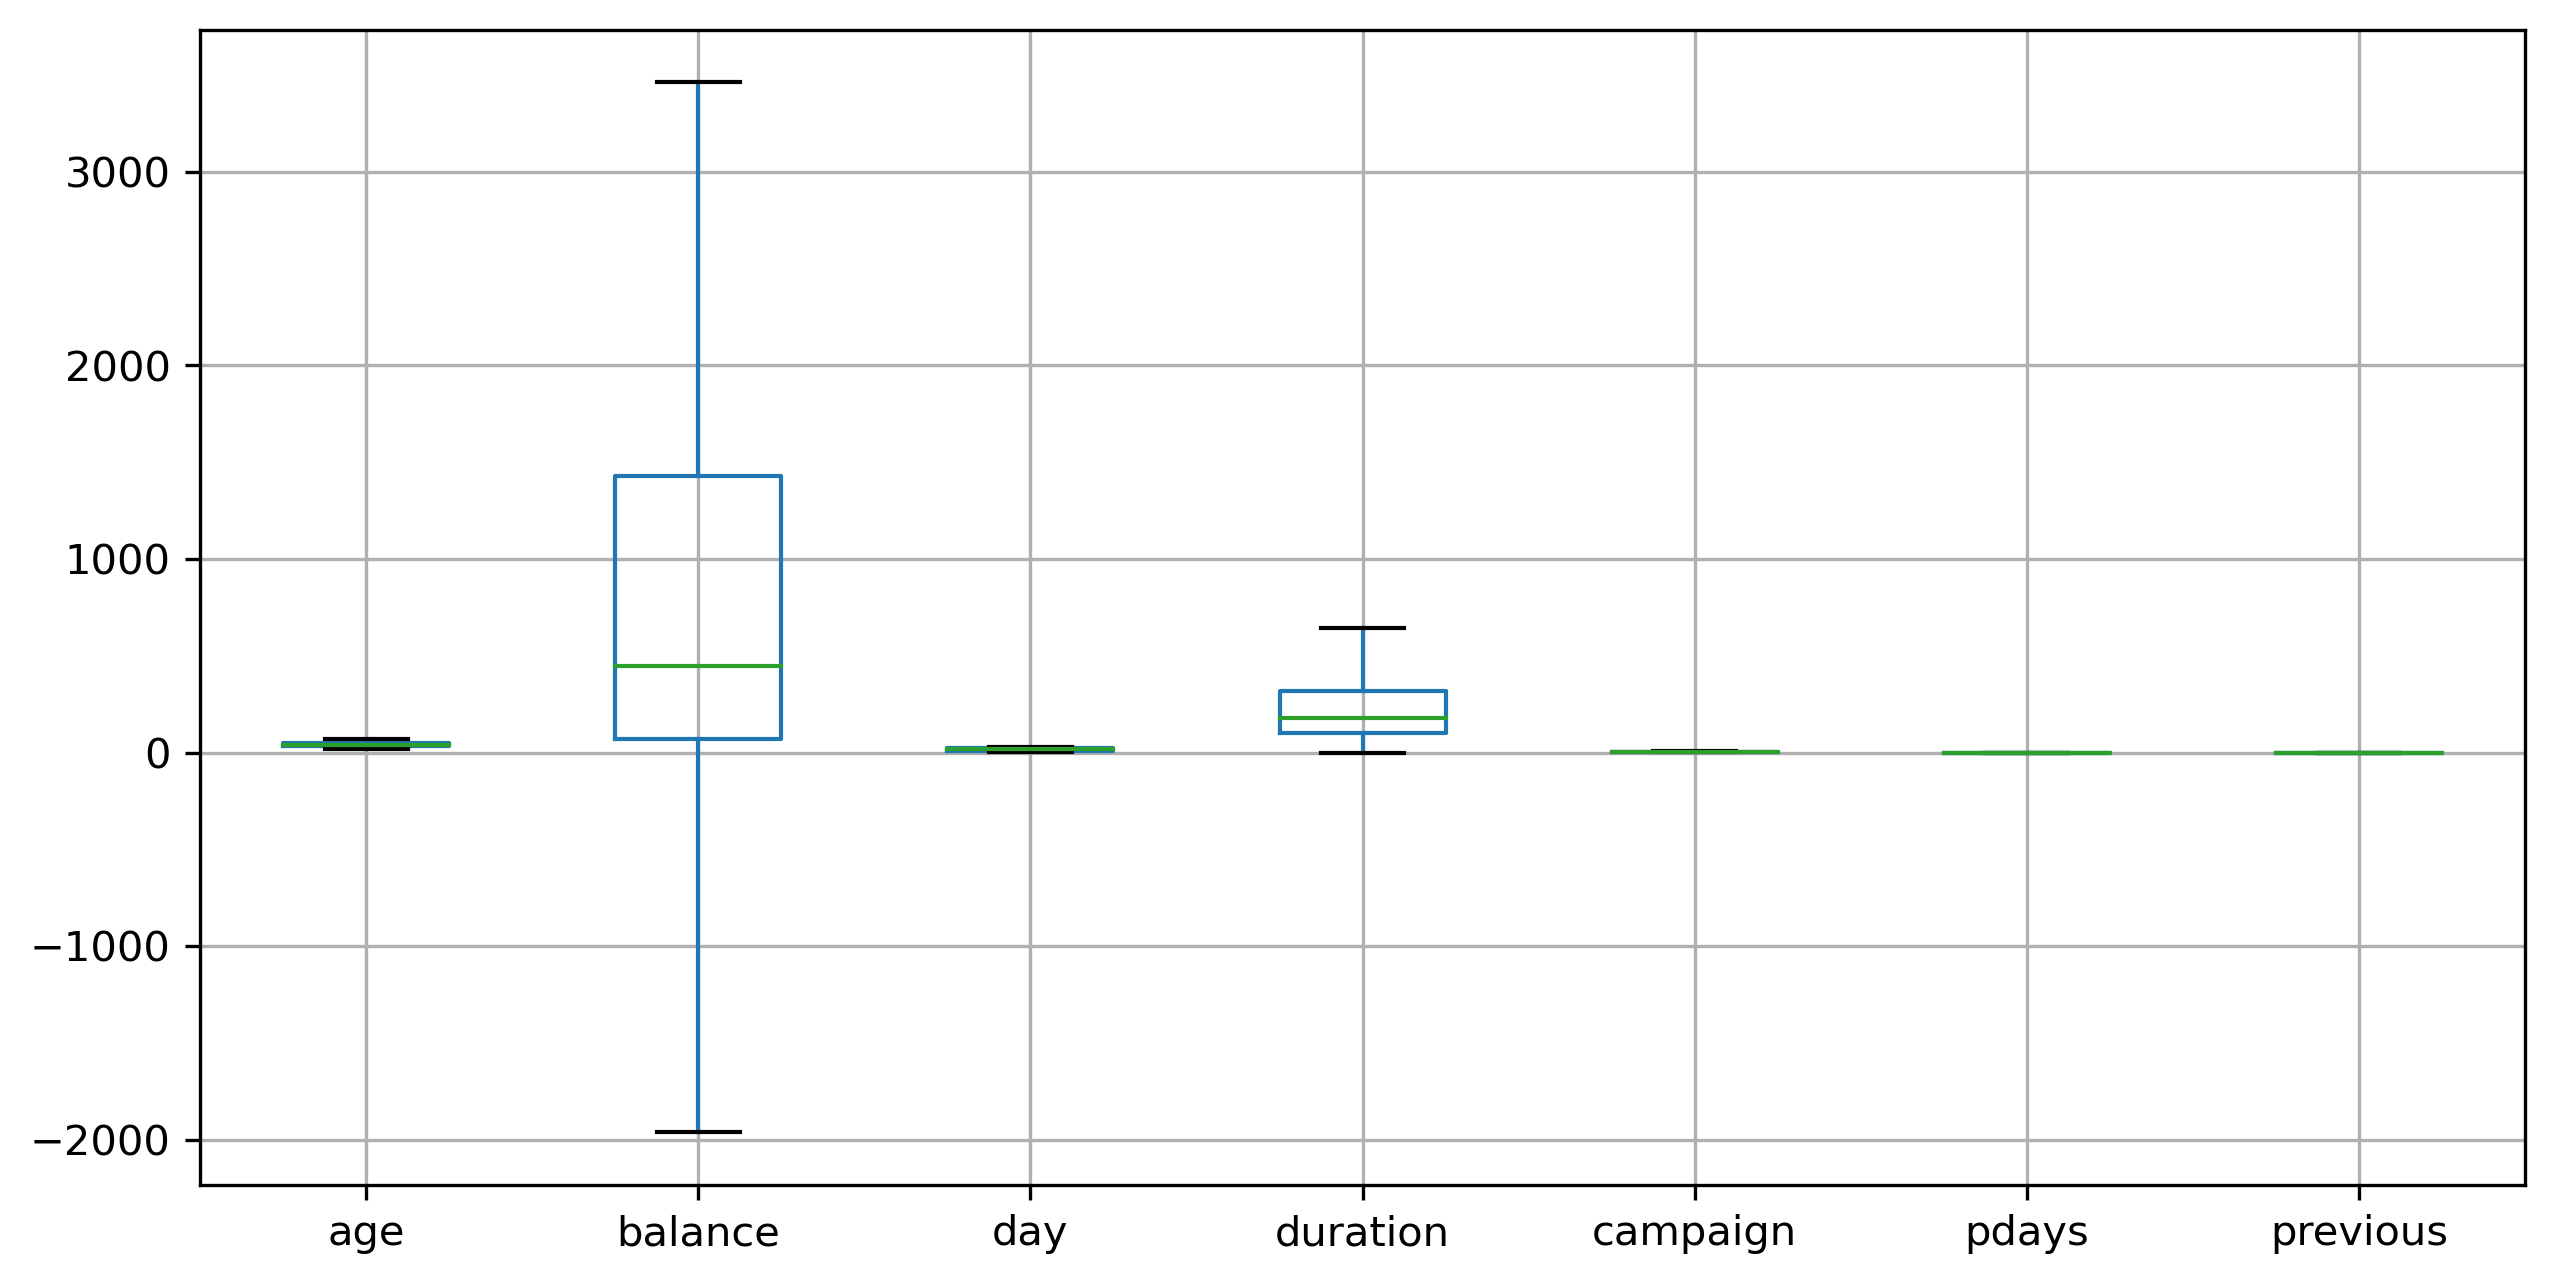

In [21]:
df.boxplot() 

In [22]:
cat_cols = df.select_dtypes(object)
cat_cols

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,cellular,may,failure,no
1,technician,single,secondary,no,yes,no,cellular,may,failure,no
2,entrepreneur,married,secondary,no,yes,yes,cellular,may,failure,no
3,blue-collar,married,secondary,no,yes,no,cellular,may,failure,no
4,blue-collar,single,secondary,no,no,no,cellular,may,failure,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,failure,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,failure,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,failure,no


In [23]:
cat_cols.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [24]:
cat_cols = df.loc[:,['job', 'marital', 'education', 'contact','poutcome']]
cat_cols

,job,marital,education,contact,poutcome
0,management,married,tertiary,cellular,failure
1,technician,single,secondary,cellular,failure
2,entrepreneur,married,secondary,cellular,failure
3,blue-collar,married,secondary,cellular,failure
4,blue-collar,single,secondary,cellular,failure
...,...,...,...,...,...
45206,technician,married,tertiary,cellular,failure
45207,retired,divorced,primary,cellular,failure
45208,retired,married,secondary,cellular,success
45209,blue-collar,married,secondary,telephone,failure


In [25]:
oe = OrdinalEncoder()
cat_cols = oe.fit_transform(cat_cols)
df.loc[:,['job', 'marital', 'education', 'contact','poutcome']] = cat_cols

In [26]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,4.0,1.0,2.0,no,2143.0,yes,no,0.0,5.0,may,261.0,1.0,-1.0,0.0,0.0,no
1,44.0,9.0,2.0,1.0,no,29.0,yes,no,0.0,5.0,may,151.0,1.0,-1.0,0.0,0.0,no
2,33.0,2.0,1.0,1.0,no,2.0,yes,yes,0.0,5.0,may,76.0,1.0,-1.0,0.0,0.0,no
3,47.0,1.0,1.0,1.0,no,1506.0,yes,no,0.0,5.0,may,92.0,1.0,-1.0,0.0,0.0,no
4,33.0,1.0,2.0,1.0,no,1.0,no,no,0.0,5.0,may,198.0,1.0,-1.0,0.0,0.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,9.0,1.0,2.0,no,825.0,no,no,0.0,17.0,nov,643.0,3.0,-1.0,0.0,0.0,yes
45207,70.5,5.0,0.0,0.0,no,1729.0,no,no,0.0,17.0,nov,456.0,2.0,-1.0,0.0,0.0,yes
45208,70.5,5.0,1.0,1.0,no,3462.0,no,no,0.0,17.0,nov,643.0,5.0,-1.0,0.0,2.0,yes
45209,57.0,1.0,1.0,1.0,no,668.0,no,no,1.0,17.0,nov,508.0,4.0,-1.0,0.0,0.0,no


In [27]:
# Custom Binary Encoding of Binary o/p variables 
df['default'] = np.where(df['default'].str.contains("yes"), 1, 0)
df['housing'] = np.where(df['housing'].str.contains("yes"), 1, 0)
df['loan'] = np.where(df['loan'].str.contains("yes"), 1, 0)
df['y'] = np.where(df['y'].str.contains("yes"), 1, 0)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,4.0,1.0,2.0,0,2143.0,1,0,0.0,5.0,may,261.0,1.0,-1.0,0.0,0.0,0
1,44.0,9.0,2.0,1.0,0,29.0,1,0,0.0,5.0,may,151.0,1.0,-1.0,0.0,0.0,0
2,33.0,2.0,1.0,1.0,0,2.0,1,1,0.0,5.0,may,76.0,1.0,-1.0,0.0,0.0,0
3,47.0,1.0,1.0,1.0,0,1506.0,1,0,0.0,5.0,may,92.0,1.0,-1.0,0.0,0.0,0
4,33.0,1.0,2.0,1.0,0,1.0,0,0,0.0,5.0,may,198.0,1.0,-1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,9.0,1.0,2.0,0,825.0,0,0,0.0,17.0,nov,643.0,3.0,-1.0,0.0,0.0,1
45207,70.5,5.0,0.0,0.0,0,1729.0,0,0,0.0,17.0,nov,456.0,2.0,-1.0,0.0,0.0,1
45208,70.5,5.0,1.0,1.0,0,3462.0,0,0,0.0,17.0,nov,643.0,5.0,-1.0,0.0,2.0,1
45209,57.0,1.0,1.0,1.0,0,668.0,0,0,1.0,17.0,nov,508.0,4.0,-1.0,0.0,0.0,0


In [28]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [29]:
df['month'].replace(['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'],
                   [1,2,3,4,5,6,7,8,9,10,11,12],inplace=True)

In [30]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,4.0,1.0,2.0,0,2143.0,1,0,0.0,5.0,5,261.0,1.0,-1.0,0.0,0.0,0
1,44.0,9.0,2.0,1.0,0,29.0,1,0,0.0,5.0,5,151.0,1.0,-1.0,0.0,0.0,0
2,33.0,2.0,1.0,1.0,0,2.0,1,1,0.0,5.0,5,76.0,1.0,-1.0,0.0,0.0,0
3,47.0,1.0,1.0,1.0,0,1506.0,1,0,0.0,5.0,5,92.0,1.0,-1.0,0.0,0.0,0
4,33.0,1.0,2.0,1.0,0,1.0,0,0,0.0,5.0,5,198.0,1.0,-1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,9.0,1.0,2.0,0,825.0,0,0,0.0,17.0,11,643.0,3.0,-1.0,0.0,0.0,1
45207,70.5,5.0,0.0,0.0,0,1729.0,0,0,0.0,17.0,11,456.0,2.0,-1.0,0.0,0.0,1
45208,70.5,5.0,1.0,1.0,0,3462.0,0,0,0.0,17.0,11,643.0,5.0,-1.0,0.0,2.0,1
45209,57.0,1.0,1.0,1.0,0,668.0,0,0,1.0,17.0,11,508.0,4.0,-1.0,0.0,0.0,0


- Define Target column and independent feature

In [31]:
x = df.iloc[:,1:]
y = df['y']

- Split the data

In [32]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.80,random_state=42)

- Model Building

In [33]:
lg = LogisticRegression()
lg.fit(xtrain,ytrain)

LogisticRegression()

In [34]:
lg.coef_

array([[-2.15887560e-01, -8.46987035e-01, -2.01376239e-01,
        -6.69811275e-02, -3.17088267e-04, -2.21678826e+00,
        -5.98496066e-01,  7.49555461e-02, -3.81949361e-02,
         5.14132355e-01,  3.83748455e-03, -8.27286391e-01,
         1.45124430e+00,  0.00000000e+00,  1.77339978e+00,
         5.98202629e+00]])

- Prediction

In [35]:
ypred = lg.predict(xtest)
ypred

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
len(xtest),len(ypred)

(9043, 9043)

In [37]:
print('Actual Y: ', ytest[:25].values)  #First 25 data points of actual value
print('Predict Y:', ypred[:25])

Actual Y:  [0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0]
Predict Y: [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0]


In [38]:
confusion_matrix(ytest,ypred)

array([[7810,  142],
       [ 168,  923]], dtype=int64)

Text(289.16666666666663, 0.5, 'Predicted Values')

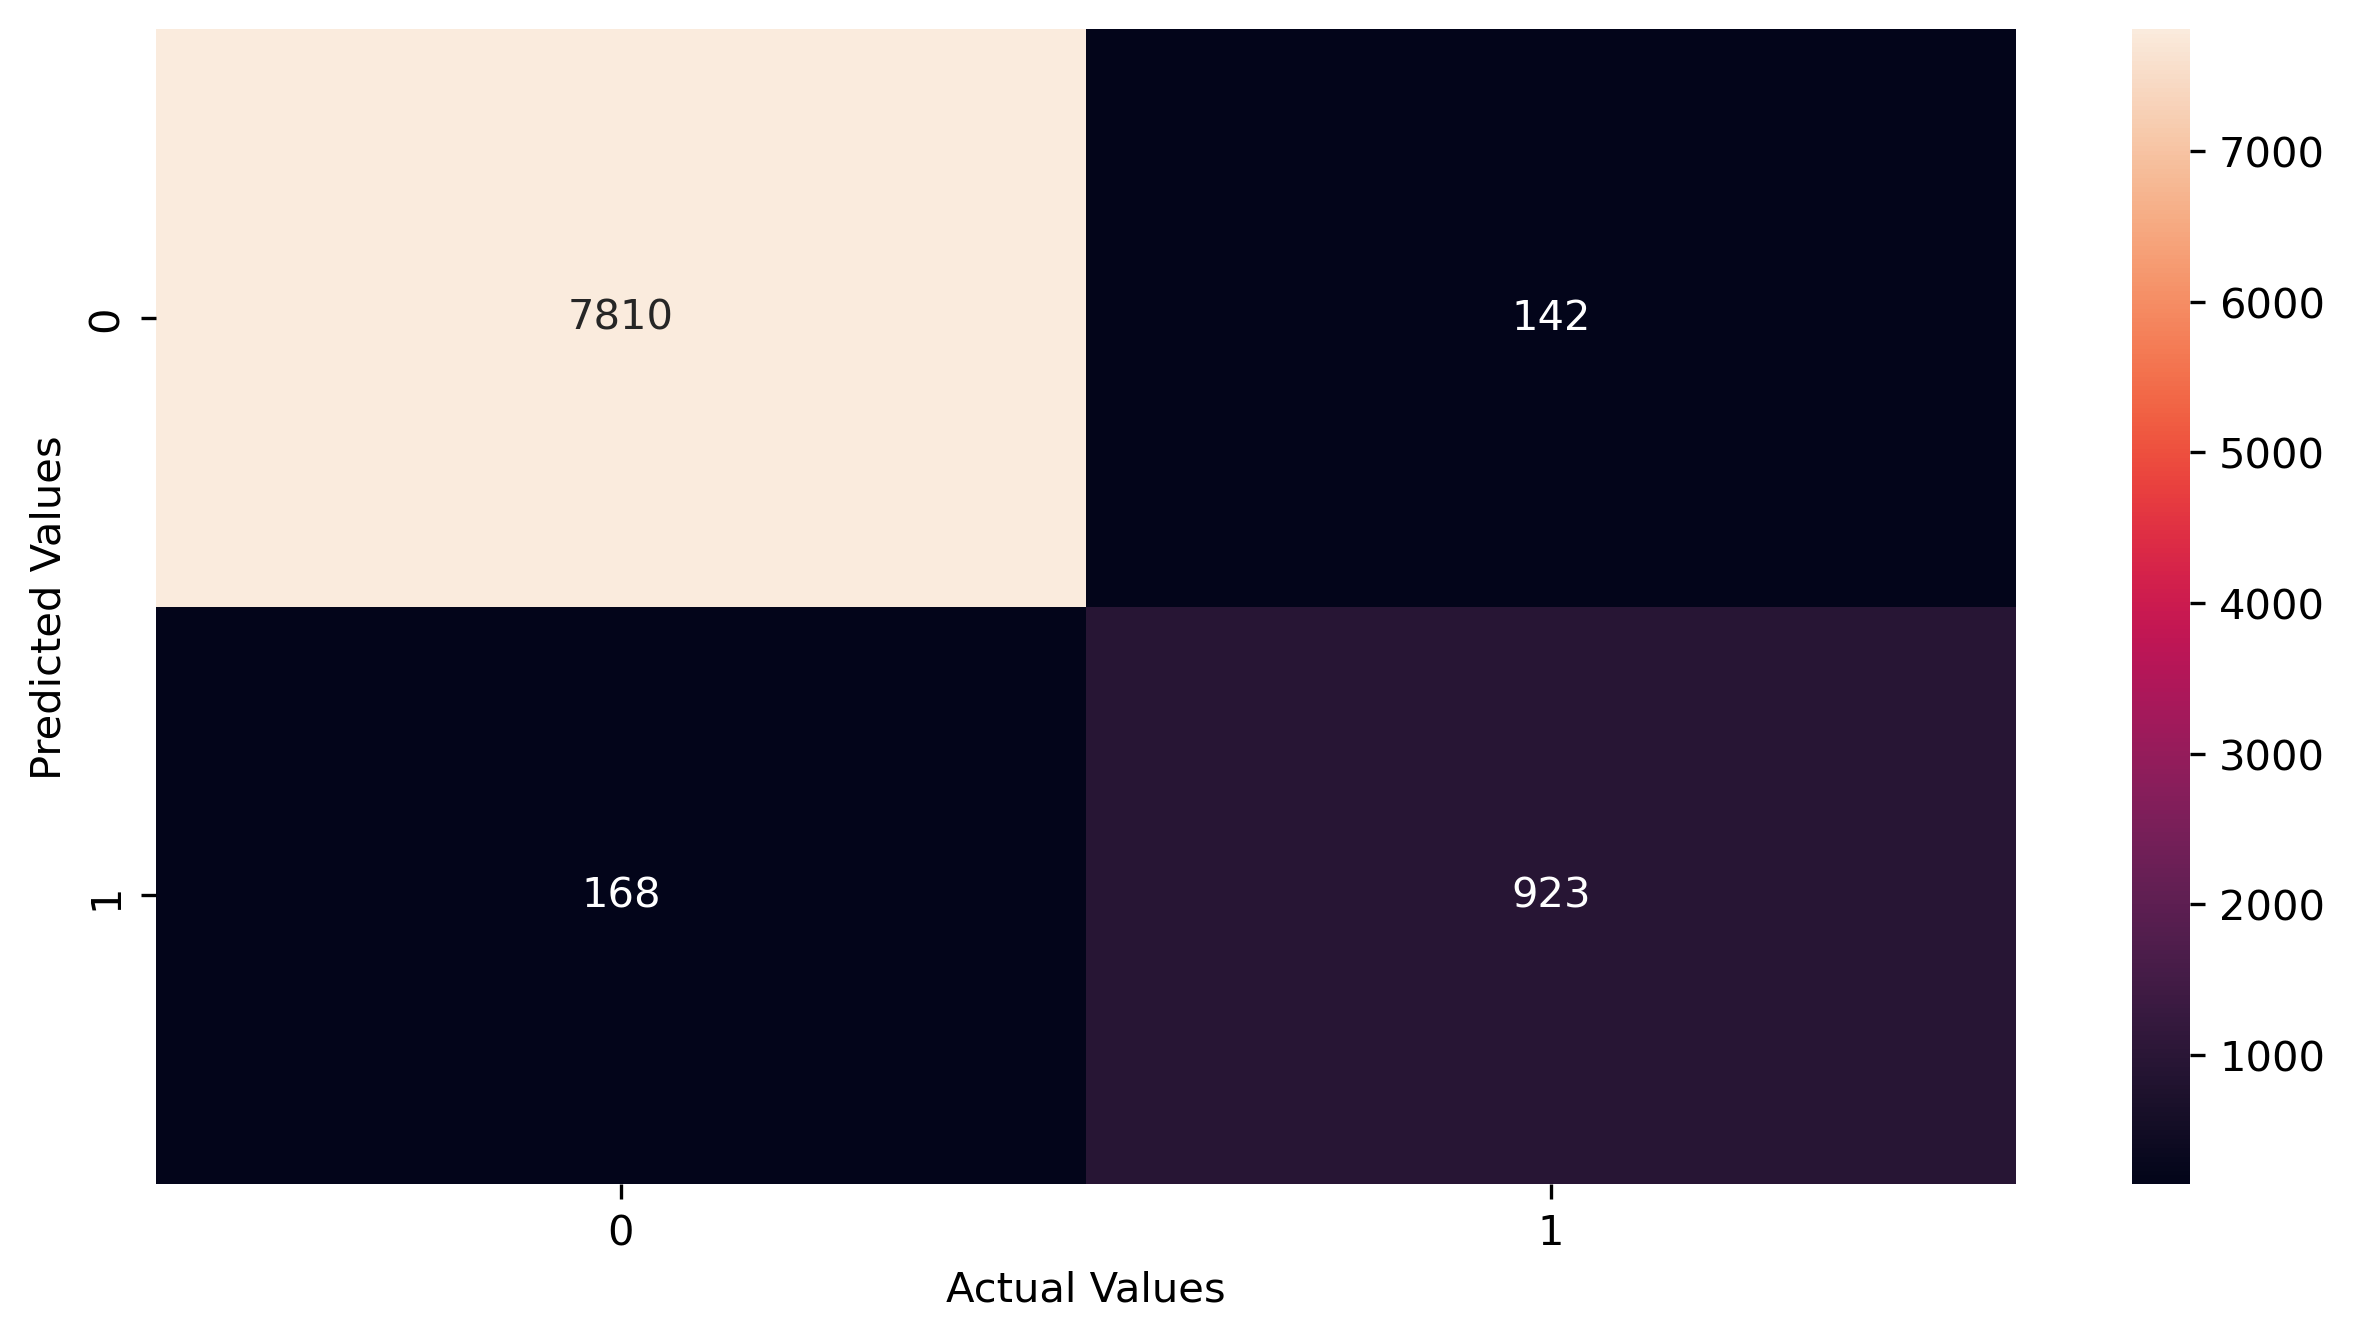

In [39]:
sns.heatmap(confusion_matrix(ytest,ypred), annot=True,fmt='g') 
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

- Evaluation 

In [40]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7952
           1       0.87      0.85      0.86      1091

    accuracy                           0.97      9043
   macro avg       0.92      0.91      0.92      9043
weighted avg       0.97      0.97      0.97      9043

